### Metpy probe: overestimating LFC given superadabats at surface

Using IOP4 to probe cape_cin, LFC miscalculations.

In [1]:
import os
import numpy as np
import scipy.io
import metpy.calc as mpcalc
from metpy.units import units
from metpy.calc import find_intersections
import matplotlib.pyplot as plt

import MSEplots.plots as mpt

os.chdir('/Users/willytsai/Desktop/IOP4/')

In [2]:
qcd = scipy.io.loadmat('qall.mat')
qcd1=qcd['qall'][:,3]
q=qcd1/1000 #*units('kilogram/kilogram')

pcd = scipy.io.loadmat('pall.mat')
p = pcd['pall'][:,3] #*units('mbar')

tcd = scipy.io.loadmat('Tall.mat')
t=tcd['tall'][:,3] #*units('degC')

zcd = scipy.io.loadmat('Zall.mat')
z=zcd['zall'][:,3] #*units('meter')

determined data_top: 100.10211575000001
intersections where Tp > T: [660.97645718 640.9981083 ] dimensionless


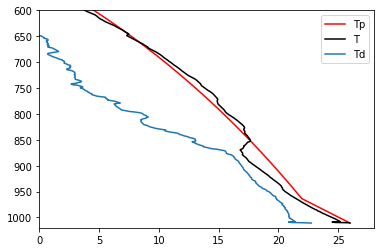

In [3]:
try:
    data_top=np.where(np.isnan(t)==1)[0][0]
except:
    data_top=t.shape[0]
    
data_top = mpt.find_nearest(p[:data_top],100); print('determined data_top:',p[data_top-1])

td = mpcalc.dewpoint_from_specific_humidity(q[:data_top],t[:data_top]*units('degC'),p[:data_top]*units('mbar'))
tp = mpcalc.parcel_profile(p[:data_top]*units('mbar'),t[0]*units('degC'),td[0]).to('degC')
plt.plot(tp.magnitude[:data_top],p[:data_top],'r',t[:data_top],p[:data_top],'k',td[:data_top].magnitude,p[:data_top])
plt.gca().invert_yaxis();plt.ylim(1020,600);plt.xlim([0,28])
plt.legend(['Tp','T','Td'])

# intersections determining the LFC in metpy
x, y = find_intersections(p[1:data_top], tp[1:data_top].magnitude,
                              t[1:data_top], direction='increasing')
print('intersections where Tp > T:',x)

In metpy, they determine the LFC by the first intersection where Tp is larger than T (above figure). A warm parcel becomes buoyant if near surface layer is of superadiabats/dry adiabats. Thus, the first intersection is around 660hpa, which is, however, not quite reasonable for this case.<br>
The determination of LFC also influences the cape_cin calculation which uses LFC as an upper/lower bound for cin/cape in intergrals. 

/Users/willytsai/anaconda3/lib/python3.6/site-packages/pint/quantity.py:1065: RuntimeWarning: invalid value encountered in greater
  return op(self._convert_magnitude_not_inplace(UnitsContainer()), other)


<module 'matplotlib.pyplot' from '/Users/willytsai/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

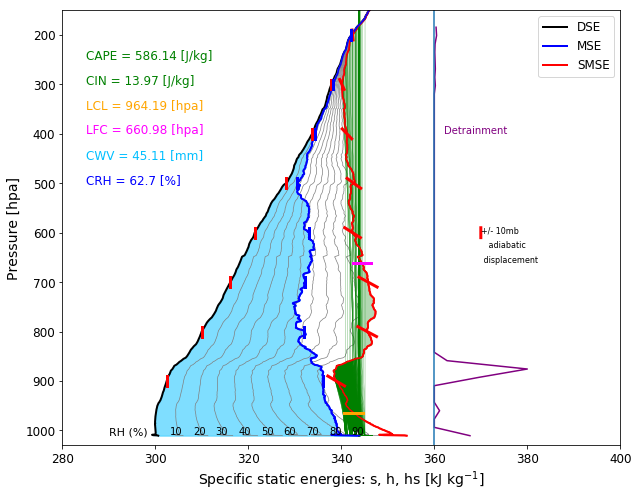

In [4]:
mpt.msed_plots(p,t,q,entrain=True)